In [14]:
from matplotlib.pyplot import imshow
import matplotlib.cm as cm
%matplotlib inline
import numpy as np
from PIL import Image

img_o = "data/test_tripple/BATH-BL_CineMR_ti07_sl01_ORIG.png"
img_ep = "data/test_tripple/BATH-BL_CineMR_ti07_sl01_EPI.png"
img_en = "data/test_tripple/BATH-BL_CineMR_ti07_sl01_ENDO.png"

In [15]:
heart_conv_val = 0.1
ep_conv_val = 65535
en_conv_val = 65535
trans_rate = 30

In [16]:
from __future__ import print_function
im_o = Image.open(img_o)
im_en = Image.open(img_en)
im_ep = Image.open(img_ep)

In [17]:
out_o = im_o.point(lambda i:( i * heart_conv_val)).convert("RGB")
out_en = im_en.point(lambda i:( i * en_conv_val)).convert("RGBA")
out_ep = im_ep.point(lambda i:( i * ep_conv_val)).convert("RGBA")

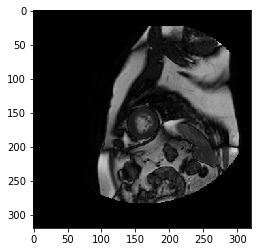

In [18]:
imshow(np.asarray(out_o))

In [19]:
s = out_en.size

for x in range(0,s[0]):
    for y in range(0,s[1]):
        cur_color = out_en.getpixel((x,y))
        if cur_color[0] > 0:
            new_color = (cur_color[0] ,0, 0, trans_rate)
        else:
            new_color = (cur_color[0], cur_color[1], cur_color[2], 0)
        out_en.putpixel((x,y), new_color)

In [20]:
s = out_ep.size

for x in range(0,s[0]):
    for y in range(0,s[1]):
        cur_color = out_ep.getpixel((x,y))
        if cur_color[0] > 0:
            new_color = (0, cur_color[1], 0, trans_rate)
        else:
            new_color = (cur_color[0], cur_color[1], cur_color[2], 0)
        out_ep.putpixel((x,y), new_color)

In [21]:
s = out_ep.size

for x in range(0,s[0]):
    for y in range(0,s[1]):
        if out_en.getpixel((x,y))[3] > 0:
            new_color = (out_ep.getpixel((x,y))[0], out_ep.getpixel((x,y))[1], out_ep.getpixel((x,y))[2], 0)
        else:
            new_color = (out_ep.getpixel((x,y))[0], out_ep.getpixel((x,y))[1], out_ep.getpixel((x,y))[2], out_ep.getpixel((x,y))[3])
        out_ep.putpixel((x,y), new_color)

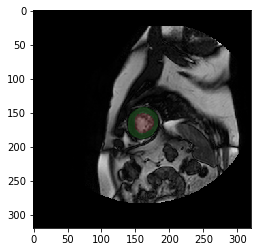

In [22]:
out_o.save("data/test_tripple/BATH-BL_CineMR_ti07_sl01_ORIG_out.png")
out_o.paste(out_ep, (0,0), out_ep)
out_o.paste(out_en, (0,0), out_en)
imshow(np.asarray(out_o))
out_o.save("data/test_tripple/BATH-BL_CineMR_ti07_sl01_ORIG_out_comp.png")